In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df=pd.DataFrame()
files=[file  for file in os.listdir("./files/Sales_Data")]
for file in files:
    df1=pd.read_csv("./files/Sales_Data/"+file)
    df=pd.concat([df,df1])

In [3]:
df.reset_index(drop=True,inplace=True)

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [5]:
###cleaning


In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df.dropna(how="any",inplace=True)

In [8]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
####still there is something to cleans

In [10]:
df[df["Order Date"].str[0:2]=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
521,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
833,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2180,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2388,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4248,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
df=df[df["Order Date"].str[0:2]!='Or']

In [12]:
df.shape  ### now we have done with cleaning

(185950, 6)

In [13]:
### checking datatype and changing it

In [14]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [15]:
df["Price Each"]=df["Price Each"].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  object 
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.9+ MB


In [16]:
df["Quantity Ordered"]=df["Quantity Ordered"].astype('int32')

In [17]:
df["month"]=pd.to_datetime(df["Order Date"]).dt.month

In [18]:
df["total_cost"]=df["Quantity Ordered"]*df["Price Each"]

In [19]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_cost
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [20]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
total_cost          float64
dtype: object

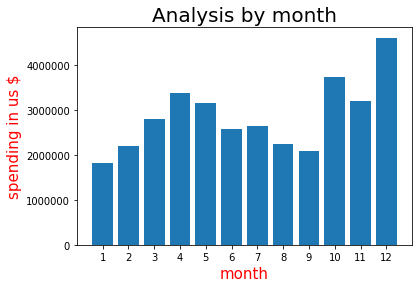

In [21]:
####ploting 
import matplotlib.pyplot as plt
new_df=df.groupby(["month"])
new_df_sale=new_df["total_cost"].sum().reset_index()
plt.bar(new_df_sale["month"],new_df_sale["total_cost"])
plt.title("Analysis by month",fontsize=20)
plt.xticks(new_df_sale["month"])
plt.xlabel("month",fontsize=15,color="red")
plt.ylabel("spending in us $",fontsize=15,color="red")
plt.show()

In [22]:
##### analysis by city

In [23]:
df.shape

(185950, 8)

In [24]:
df["city"]=df["Purchase Address"].apply(lambda x:x.split(",")[1])
df.city.value_counts()


 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: city, dtype: int64

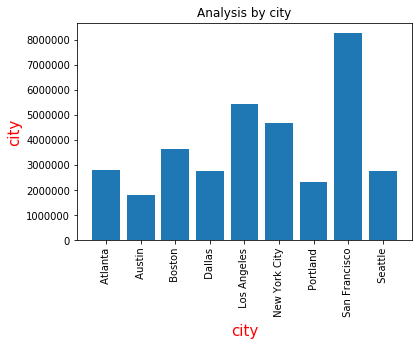

In [42]:
###ploting graph
new_sale=df.groupby(["city"]).sum().reset_index()
#new_sale=new["total_cost"].sum().reset_index()
plt.bar(new_sale["city"],new_sale["total_cost"])
plt.xticks(new_sale["city"],rotation="vertical")
plt.xlabel("city",fontsize=15,color="red")
plt.ylabel("city",fontsize=15,color="red")
plt.title("Analysis by city")
plt.show()

In [26]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
total_cost          float64
city                 object
dtype: object

In [27]:
df["hour"]=pd.to_datetime(df["Order Date"]).dt.hour


In [28]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_cost,city,hour
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas,10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles,17
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City,17
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City,22
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles,16
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


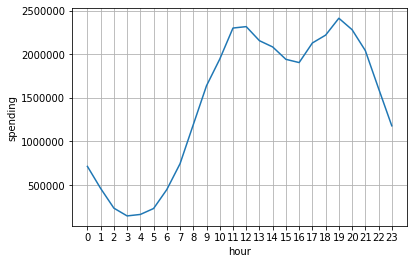

In [41]:
new_sale=df.groupby("hour").sum().reset_index()
#new_sale=new["total_cost"].
plt.plot(new_sale["hour"],new_sale["total_cost"])
plt.grid()
plt.xticks(new_sale["hour"])
plt.xlabel("hour")
plt.ylabel("spending")
plt.show()


In [30]:
#### which pair was sold most

In [31]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_cost,city,hour
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas,10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles,17
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City,17
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City,22
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles,16
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [32]:
df1=df[df["Order ID"].duplicated(keep=False)]#### keeping only duplicate item

In [33]:
df1["combined"]=df1.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df1=df1[["Order ID","combined"]].drop_duplicates()

In [35]:
from itertools import combinations
from collections import Counter

count = Counter()
for x in df1["combined"]:
       row_list=x.split(',')
       count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [36]:
for key,value in count.most_common(5):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


In [37]:
#### which item sold most time 

In [38]:
new=df.groupby("Product").sum()
new.head(10)

,Quantity Ordered,Price Each,month,total_cost,hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


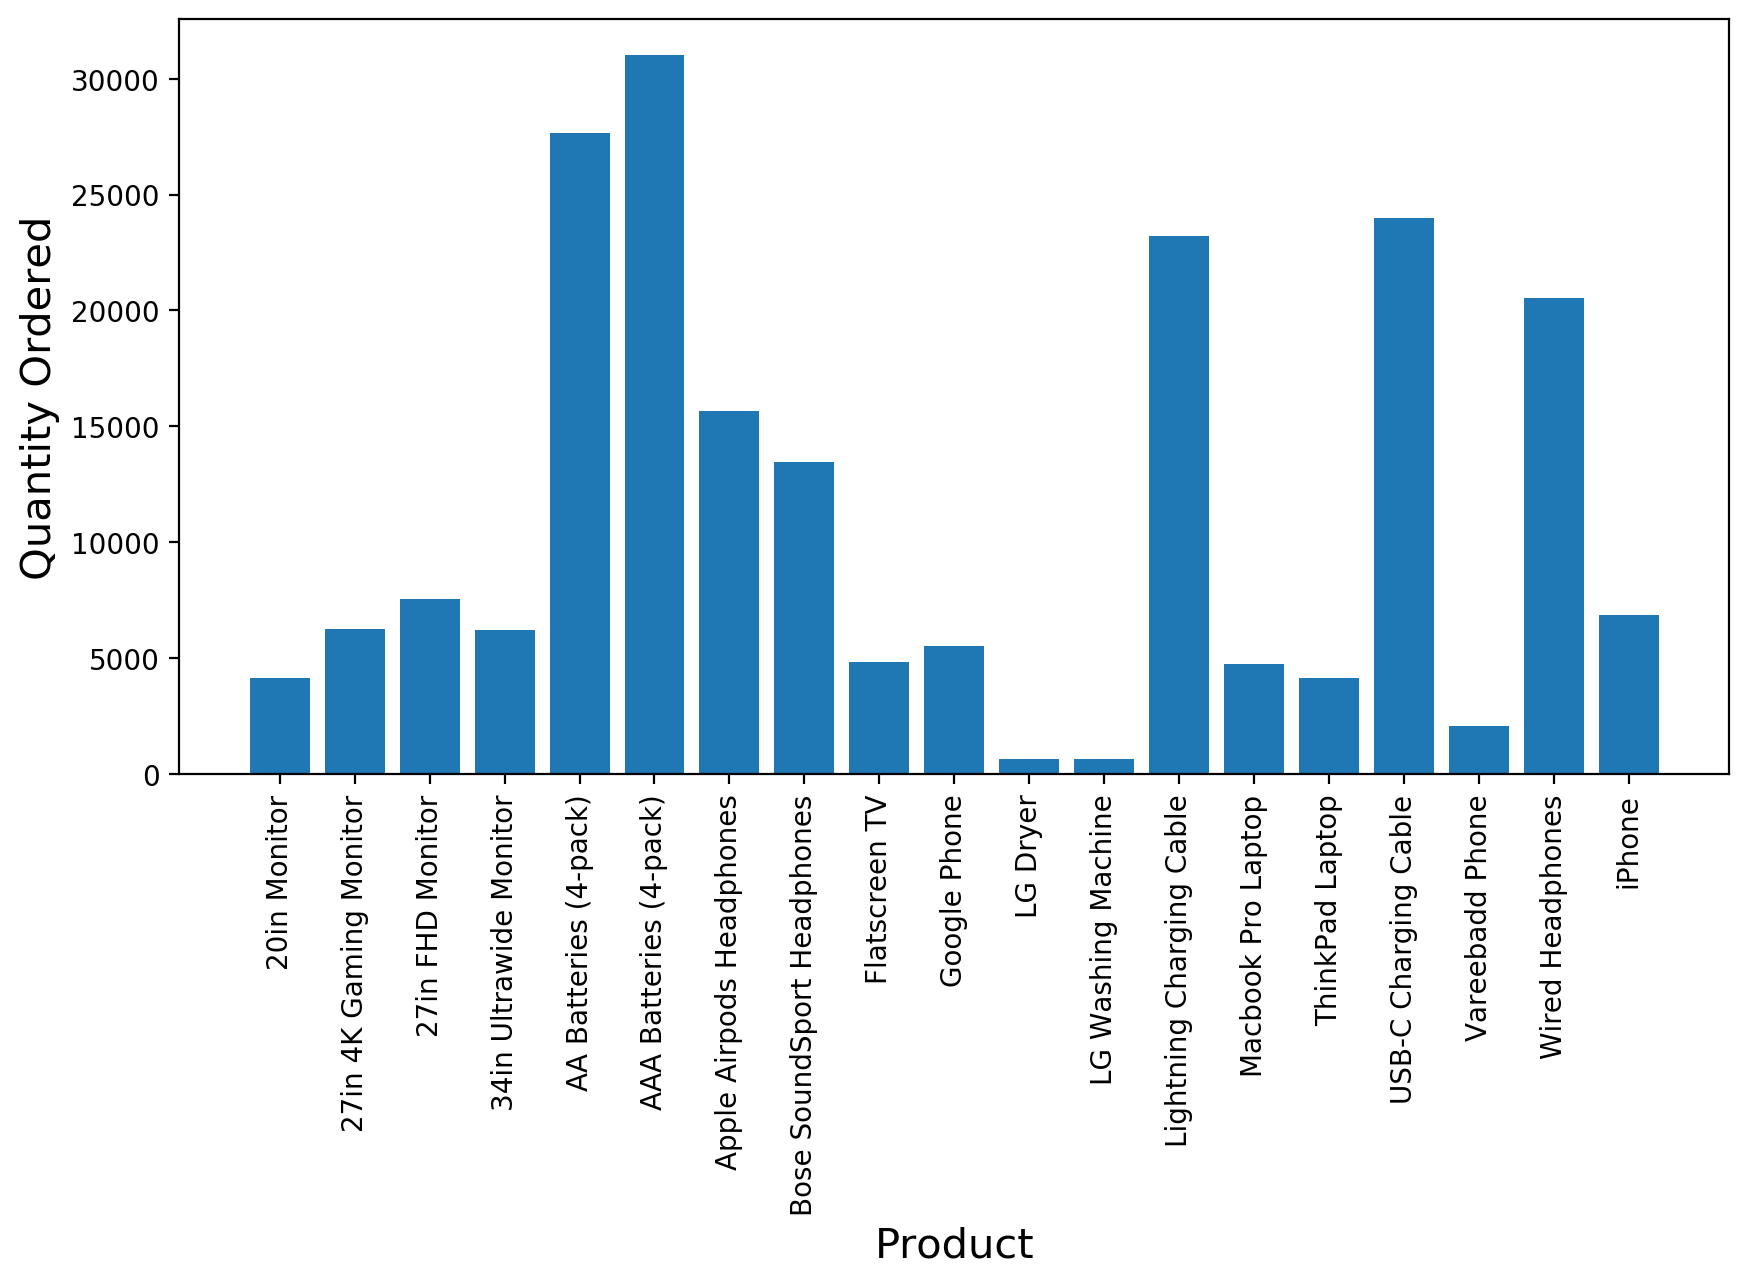

In [39]:
new=df.groupby("Product")
new_total=new["Quantity Ordered"].sum().reset_index()
plt.figure(figsize=(10,5),dpi=200)
plt.bar(new_total["Product"],new_total["Quantity Ordered"])
plt.xticks(new_total["Product"],rotation="vertical")
plt.xlabel("Product",fontsize=15)
plt.ylabel("Quantity Ordered",fontsize=15)
plt.show()